In [1]:
'''
Covid-19 Analytics for Iraq, based on John Hopkins Univeristy data
https://github.com/Muntadher91/COVID-19

'''
import pandas as pd

In [2]:
confirmed =  pd.read_csv('./COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv',
                         index_col = 'Country/Region')
deaths =  pd.read_csv('./COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv',
                         index_col = 'Country/Region')
recovered =  pd.read_csv('./COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv',
                         index_col = 'Country/Region')


In [3]:
#cleanup for data

In [4]:

def cleanup(df):
    
    '''Cleanup and filtering'''
    
    df.dropna(how='all')
    df.drop(['Province/State','Lat','Long'], axis=1, inplace=True)
    df.columns = pd.to_datetime(confirmed.columns)
    return df
confirmed = cleanup(confirmed)
recovered = cleanup(recovered)
deaths = cleanup(deaths)


In [5]:
iraq = pd.DataFrame({'Confirmed':confirmed.loc['Iraq'],
                    'Deaths':deaths.loc['Iraq'],
                    'Recovered':recovered.loc['Iraq']})

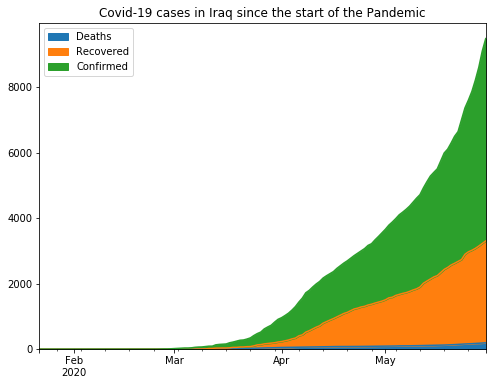

In [6]:
# Total cases since beginning of the Pandemic
iraq[['Deaths','Recovered','Confirmed']].plot(kind='area', title='Covid-19 cases in Iraq since the start of the Pandemic'
                                              ,figsize=(8,6))

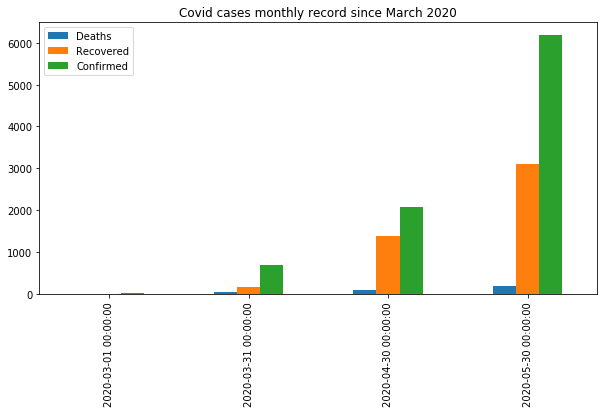

In [7]:
#Monthly development:
iraq_monthly_stats = iraq[['Deaths','Recovered','Confirmed']][39::30]
iraq_monthly_stats.plot(kind='bar',figsize=(10,5), title='Covid cases monthly record since March 2020')

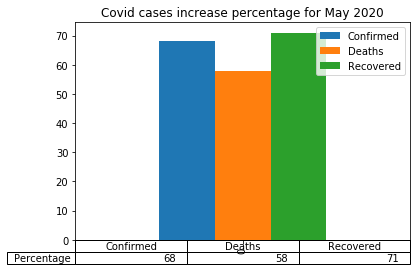

In [11]:
percentage_increase_may = iraq[100::].sum()/iraq.sum()*100
percentage_increase_may = percentage_increase_may.astype('int')
percentage_increase_may = percentage_increase_may.to_frame()
percentage_increase_may.columns=['Percentage']
percentage_increase_may = percentage_increase_may.T
percentage_increase_may.plot(y=['Confirmed','Deaths','Recovered'],kind='bar',title='Covid cases increase percentage for May 2020',
                            table=percentage_increase_may, use_index = False)
